# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Spencer_Macey/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q='Bitcoin',
    language='en'
)

In [5]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q='Ethereum',
    language='en'
)

In [6]:
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [7]:
bitcoin_news_df = create_df(bitcoin_news_en['articles'], 'en')
ethereum_news_df = create_df(ethereum_news_en['articles'], 'en')

In [8]:
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [9]:
# Create the Bitcoin sentiment scores DataFrame
title_sent_btc = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent_btc = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in bitcoin_news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent_btc["title_compound"].append(title_sentiment["compound"])
        title_sent_btc["title_pos"].append(title_sentiment["pos"])
        title_sent_btc["title_neu"].append(title_sentiment["neu"])
        title_sent_btc["title_neg"].append(title_sentiment["neg"])
        title_sent_btc["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent_btc["text_compound"].append(text_sentiment["compound"])
        text_sent_btc["text_pos"].append(text_sentiment["pos"])
        text_sent_btc["text_neu"].append(text_sentiment["neu"])
        text_sent_btc["text_neg"].append(text_sentiment["neg"])
        text_sent_btc["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent_btc)
text_sentiment_df = pd.DataFrame(text_sent_btc)
bitcoin_news_df = bitcoin_news_df.join(title_sentiment_df).join(text_sentiment_df)

In [10]:
# Create the Ethereum sentiment scores DataFrame
# Create the Bitcoin sentiment scores DataFrame
title_sent_eth = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent_eth = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ethereum_news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent_eth["title_compound"].append(title_sentiment["compound"])
        title_sent_eth["title_pos"].append(title_sentiment["pos"])
        title_sent_eth["title_neu"].append(title_sentiment["neu"])
        title_sent_eth["title_neg"].append(title_sentiment["neg"])
        title_sent_eth["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent_eth["text_compound"].append(text_sentiment["compound"])
        text_sent_eth["text_pos"].append(text_sentiment["pos"])
        text_sent_eth["text_neu"].append(text_sentiment["neu"])
        text_sent_eth["text_neg"].append(text_sentiment["neg"])
        text_sent_eth["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent_eth)
text_sentiment_df = pd.DataFrame(text_sent_eth)
ethereum_news_df = ethereum_news_df.join(title_sentiment_df).join(text_sentiment_df)

In [11]:
bitcoin_news_df = bitcoin_news_df.set_index('title')

In [12]:
bitcoin_news_df = bitcoin_news_df.dropna().reset_index()

In [13]:
bitcoin_news_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,An Engineer Gets 9 Years for Stealing $10M Fro...,The defendant tried—and failed—to use bitcoin ...,A former Microsoft software engineer from Ukra...,2020-11-12,en,-0.5719,0.000,0.684,0.316,-1,-0.6705,0.064,0.737,0.199,-1.0
1,Is the New Visa Bitcoin Rewards Card Worth It?,Visa has partnered with cryptocurrency startup...,Visa has partnered with cryptocurrency startup...,2020-12-03,en,0.6124,0.417,0.583,0.000,1,0.6369,0.162,0.838,0.000,1.0
2,"PayPal now lets all US users buy, sell and hol...",PayPal is bringing its newly-announced support...,PayPal is bringing its newly-announced support...,2020-11-12,en,0.0000,0.000,1.000,0.000,0,0.2144,0.053,0.947,0.000,1.0
3,"Bitcoin is flirting with $20,000 again. How hi...","In November 2017, after an absolutely massive,...","In November 2017, after an absolutely massive,...",2020-11-20,en,0.2023,0.130,0.870,0.000,1,0.2023,0.050,0.950,0.000,1.0
4,You can now spend China's digital currency at ...,China’s official digital currency is now usabl...,"Unlike ‘conventional’ cryptocurrencies, a cent...",2020-12-06,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0.0


In [14]:
ethereum_news_df = ethereum_news_df.set_index('title')

In [15]:
ethereum_news_df = ethereum_news_df.dropna().reset_index()

In [16]:
ethereum_news_df

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,"PayPal now lets all US users buy, sell and hol...",PayPal is bringing its newly-announced support...,PayPal is bringing its newly-announced support...,2020-11-12,en,0.0000,0.000,1.000,0.000,0,0.2144,0.053,0.947,0.000,1
1,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
2,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
3,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,LONDON (Reuters) - Digital currencies Ethereum...,2020-11-23,en,0.0000,0.000,1.000,0.000,0,0.4215,0.088,0.912,0.000,1
4,Crypto fund inflows hit second highest on reco...,Institutional investors pumped $429 million in...,NEW YORK (Reuters) - Institutional investors p...,2020-12-07,en,0.1779,0.116,0.884,0.000,1,0.1779,0.052,0.948,0.000,1
5,Crypto fund inflows hit second highest on reco...,Institutional investors pumped $429 million in...,NEW YORK (Reuters) - Institutional investors p...,2020-12-07,en,0.1779,0.124,0.876,0.000,1,0.1779,0.052,0.948,0.000,1
6,PayPal's version of GoFundMe is called Generos...,"PayPal has launched the Generosity Network, a ...","PayPal has launched the Generosity Network, a ...",2020-11-19,en,0.5106,0.320,0.680,0.000,1,0.8779,0.318,0.682,0.000,1
7,"Bitcoin leads cryptocurrency selloff, down 9.7...",Bitcoin led a broad cryptocurrency selloff on ...,By Reuters Staff\r\nFILE PHOTO: A representati...,2020-11-26,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
8,"Bitcoin leads cryptocurrency selloff, down 9.7...",Bitcoin led a broad cryptocurrency selloff on ...,By Reuters Staff\r\nFILE PHOTO: A representati...,2020-11-26,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
9,Crypto exchange Coinbase comments on negative ...,The New York Times is (probably) about to publ...,The New York Times is (probably) about to publ...,2020-11-26,en,-0.5719,0.000,0.791,0.209,-1,0.0000,0.000,1.000,0.000,0


In [17]:
# Describe the Bitcoin Sentiment
bitcoin_news_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.015283,0.052333,0.905333,0.042333,0.111111,0.076783,0.049500,0.923333,0.027167,0.277778
std,0.273145,0.113725,0.149868,0.101837,0.582983,0.349155,0.062249,0.101045,0.067809,0.669113
min,-0.571900,0.000000,0.583000,0.000000,-1.000000,-0.670500,0.000000,0.716000,0.000000,-1.000000
25%,0.000000,0.000000,0.829500,0.000000,0.000000,0.000000,0.000000,0.849250,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.025000,0.975000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.211375,0.067750,1.000000,0.000000,1.000000
max,0.612400,0.417000,1.000000,0.316000,1.000000,0.636900,0.174000,1.000000,0.215000,1.000000


In [18]:
# Describe the Ethereum Sentiment
ethereum_news_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,-0.022470,0.028000,0.939350,0.032650,0.000000,0.122565,0.060950,0.918000,0.021050,0.25000
std,0.223303,0.077985,0.103393,0.080827,0.561951,0.320198,0.078682,0.105304,0.054473,0.71635
min,-0.571900,0.000000,0.680000,0.000000,-1.000000,-0.493900,0.000000,0.672000,0.000000,-1.00000
25%,0.000000,0.000000,0.882000,0.000000,0.000000,0.000000,0.000000,0.876000,0.000000,0.00000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.052000,0.948000,0.000000,0.00000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.261275,0.095250,1.000000,0.000000,1.00000
max,0.510600,0.320000,1.000000,0.262000,1.000000,0.877900,0.318000,1.000000,0.196000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [20]:
lemmatizer = WordNetLemmatizer()

In [21]:
# Expand the default stopwords list if necessary
sw_addon = {'ha', 'volod', 'char'}

In [22]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]") 
    
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Create a list of the words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    # Remove the stop words
    lower = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return lower

In [23]:
tokenizer(bitcoin_news_df['text'][0])

['former',
 'microsoft',
 'software',
 'engineer',
 'ukraine',
 'sentenced',
 'nine',
 'year',
 'prison',
 'stealing',
 'million',
 'store',
 'credit',
 'microsofts',
 'online',
 'store']

In [24]:
# Create a new tokens column for Bitcoin
bitcoin_news_df['Tokens'] = [(tokenizer(bitcoin_news_df['text'][i])) for i in range (len(bitcoin_news_df['text']))]

In [61]:
bitcoin_news_df['Tokens2'] = bitcoin_news_df['text'].apply(tokenizer)

In [62]:
bitcoin_news_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,Tokens,Tokens2
0,An Engineer Gets 9 Years for Stealing $10M Fro...,The defendant tried—and failed—to use bitcoin ...,A former Microsoft software engineer from Ukra...,2020-11-12,en,-0.5719,0.000,0.684,0.316,-1,-0.6705,0.064,0.737,0.199,-1.0,"[former, microsoft, software, engineer, ukrain...","[former, microsoft, software, engineer, ukrain..."
1,Is the New Visa Bitcoin Rewards Card Worth It?,Visa has partnered with cryptocurrency startup...,Visa has partnered with cryptocurrency startup...,2020-12-03,en,0.6124,0.417,0.583,0.000,1,0.6369,0.162,0.838,0.000,1.0,"[visahas, partnered, cryptocurrency, startup, ...","[visahas, partnered, cryptocurrency, startup, ..."
2,"PayPal now lets all US users buy, sell and hol...",PayPal is bringing its newly-announced support...,PayPal is bringing its newly-announced support...,2020-11-12,en,0.0000,0.000,1.000,0.000,0,0.2144,0.053,0.947,0.000,1.0,"[paypal, bringing, newlyannounced, support, cr...","[paypal, bringing, newlyannounced, support, cr..."
3,"Bitcoin is flirting with $20,000 again. How hi...","In November 2017, after an absolutely massive,...","In November 2017, after an absolutely massive,...",2020-11-20,en,0.2023,0.130,0.870,0.000,1,0.2023,0.050,0.950,0.000,1.0,"[november, absolutely, massive, twomonth, rall...","[november, absolutely, massive, twomonth, rall..."
4,You can now spend China's digital currency at ...,China’s official digital currency is now usabl...,"Unlike ‘conventional’ cryptocurrencies, a cent...",2020-12-06,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0.0,"[unlike, conventional, cryptocurrencies, centr...","[unlike, conventional, cryptocurrencies, centr..."


In [26]:
# Create a new tokens column for Ethereum
ethereum_news_df['Tokens'] = [(tokenizer(ethereum_news_df['text'][i])) for i in range (len(ethereum_news_df['text']))]

In [27]:
ethereum_news_df

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,Tokens
0,"PayPal now lets all US users buy, sell and hol...",PayPal is bringing its newly-announced support...,PayPal is bringing its newly-announced support...,2020-11-12,en,0.0000,0.000,1.000,0.000,0,0.2144,0.053,0.947,0.000,1,"[paypal, bringing, newlyannounced, support, cr..."
1,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[file, photo, representation, ethereum, virtua..."
2,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[file, photo, representation, ethereum, virtua..."
3,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,LONDON (Reuters) - Digital currencies Ethereum...,2020-11-23,en,0.0000,0.000,1.000,0.000,0,0.4215,0.088,0.912,0.000,1,"[london, reuters, digital, currency, ethereum,..."
4,Crypto fund inflows hit second highest on reco...,Institutional investors pumped $429 million in...,NEW YORK (Reuters) - Institutional investors p...,2020-12-07,en,0.1779,0.116,0.884,0.000,1,0.1779,0.052,0.948,0.000,1,"[new, york, reuters, institutional, investor, ..."
5,Crypto fund inflows hit second highest on reco...,Institutional investors pumped $429 million in...,NEW YORK (Reuters) - Institutional investors p...,2020-12-07,en,0.1779,0.124,0.876,0.000,1,0.1779,0.052,0.948,0.000,1,"[new, york, reuters, institutional, investor, ..."
6,PayPal's version of GoFundMe is called Generos...,"PayPal has launched the Generosity Network, a ...","PayPal has launched the Generosity Network, a ...",2020-11-19,en,0.5106,0.320,0.680,0.000,1,0.8779,0.318,0.682,0.000,1,"[paypal, launched, generosity, network, platfo..."
7,"Bitcoin leads cryptocurrency selloff, down 9.7...",Bitcoin led a broad cryptocurrency selloff on ...,By Reuters Staff\r\nFILE PHOTO: A representati...,2020-11-26,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[reuters, stafffile, photo, representation, vi..."
8,"Bitcoin leads cryptocurrency selloff, down 9.7...",Bitcoin led a broad cryptocurrency selloff on ...,By Reuters Staff\r\nFILE PHOTO: A representati...,2020-11-26,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[reuters, stafffile, photo, representation, vi..."
9,Crypto exchange Coinbase comments on negative ...,The New York Times is (probably) about to publ...,The New York Times is (probably) about to publ...,2020-11-26,en,-0.5719,0.000,0.791,0.209,-1,0.0000,0.000,1.000,0.000,0,"[new, york, times, probably, publish, story, c..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [28]:
from collections import Counter
from nltk import ngrams

In [28]:
def token_list_maker(column_of_tokens):
    
    tokens = []
    for word_list in column_of_tokens:
        for word in word_list:
            tokens.append(word)
    return tokens

In [71]:
btc_token = token_list_maker(bitcoin_news_df['Tokens'])

In [70]:
eth_tokens = token_list_maker(ethereum_news_df['Tokens'])

In [72]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = Counter(ngrams(btc_tokens, n=2))
print(dict(btc_bigram_counts))

{('former', 'microsoft'): 2, ('microsoft', 'software'): 2, ('software', 'engineer'): 2, ('engineer', 'ukraine'): 2, ('ukraine', 'sentenced'): 2, ('sentenced', 'nine'): 2, ('nine', 'year'): 2, ('year', 'prison'): 2, ('prison', 'stealing'): 2, ('stealing', 'million'): 2, ('million', 'store'): 2, ('store', 'credit'): 2, ('credit', 'microsofts'): 2, ('microsofts', 'online'): 2, ('online', 'store'): 1, ('store', 'visahas'): 1, ('visahas', 'partnered'): 1, ('partnered', 'cryptocurrency'): 1, ('cryptocurrency', 'startup'): 1, ('startup', 'blockfi'): 1, ('blockfi', 'offer'): 1, ('offer', 'first'): 1, ('first', 'reward'): 1, ('reward', 'credit'): 1, ('credit', 'card'): 1, ('card', 'pay'): 1, ('pay', 'bitcoin'): 1, ('bitcoin', 'rather'): 1, ('rather', 'cash'): 1, ('cash', 'worth'): 1, ('worth', 'applying'): 1, ('applying', 'unless'): 1, ('unless', 'youre'): 1, ('youre', 'extremely'): 1, ('extremely', 'bullish'): 1, ('bullish', 'paypal'): 1, ('paypal', 'bringing'): 1, ('bringing', 'newlyannounced

In [32]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = Counter(ngrams(eth_tokens, n=2))
print(dict(eth_bigram_counts))

{('paypal', 'bringing'): 1, ('bringing', 'newlyannounced'): 1, ('newlyannounced', 'support'): 1, ('support', 'cryptocurrency'): 1, ('cryptocurrency', 'us'): 1, ('us', 'account'): 1, ('account', 'first'): 1, ('first', 'announced'): 1, ('announced', 'plan'): 1, ('plan', 'open'): 1, ('open', 'cryptocurrency'): 1, ('cryptocurrency', 'trading'): 1, ('trading', 'usbased'): 1, ('usbased', 'user'): 1, ('user', 'october'): 1, ('october', 'wa'): 1, ('wa', 'file'): 1, ('file', 'photo'): 2, ('photo', 'representation'): 6, ('representation', 'ethereum'): 3, ('ethereum', 'virtual'): 3, ('virtual', 'currency'): 9, ('currency', 'standing'): 2, ('standing', 'pc'): 2, ('pc', 'motherboard'): 2, ('motherboard', 'seen'): 2, ('seen', 'illustration'): 5, ('illustration', 'picture'): 2, ('picture', 'february'): 2, ('february', 'reutersdado'): 2, ('reutersdado', 'ruvicillustrationlondon'): 3, ('ruvicillustrationlondon', 'reuters'): 3, ('reuters', 'file'): 1, ('reuters', 'london'): 1, ('london', 'reuters'): 1, 

In [33]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [34]:
# Get the top 10 words for Bitcoin
print(dict(btc_bigram_counts.most_common(10)))

{('virtual', 'currency'): 4, ('currency', 'bitcoin'): 4, ('illustration', 'taken'): 4, ('photo', 'representations'): 3, ('representations', 'virtual'): 3, ('reuters', 'stafffile'): 3, ('stafffile', 'photo'): 3, ('former', 'microsoft'): 2, ('microsoft', 'software'): 2, ('software', 'engineer'): 2}


In [35]:
# Get the top 10 words for Ethereum
print(dict(eth_bigram_counts.most_common(10)))

{('virtual', 'currency'): 9, ('photo', 'representation'): 6, ('currency', 'bitcoin'): 6, ('illustration', 'taken'): 6, ('seen', 'illustration'): 5, ('representation', 'virtual'): 5, ('bitcoin', 'seen'): 5, ('taken', 'november'): 5, ('november', 'reutersdado'): 5, ('york', 'reuters'): 4}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [37]:
btc_string = ' '.join(btc_tokens)
eth_string = ' '.join(eth_tokens)

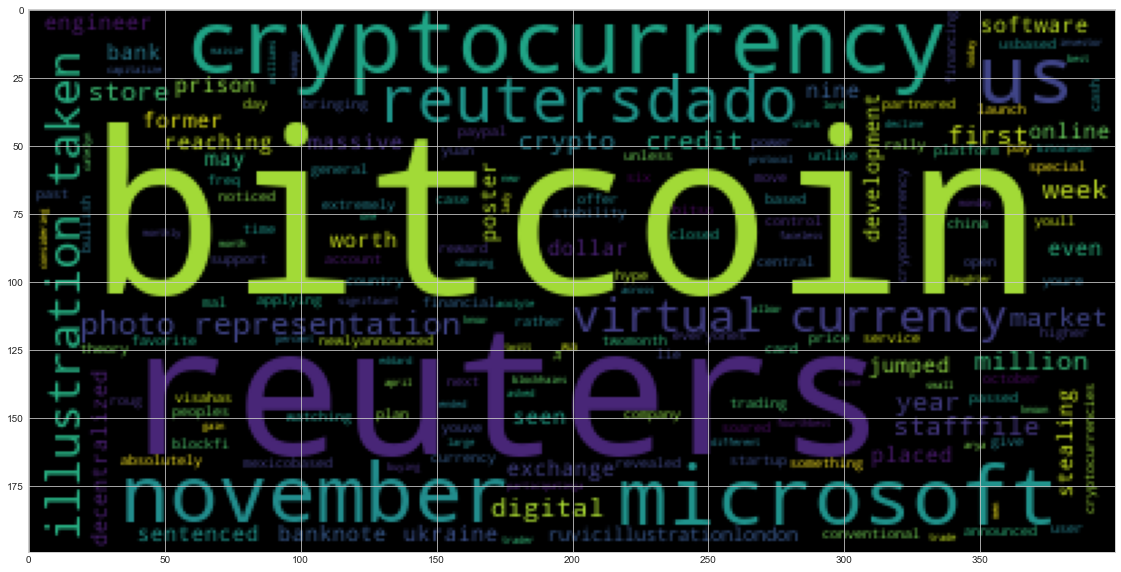

In [38]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(btc_string)
plt.imshow(wc)

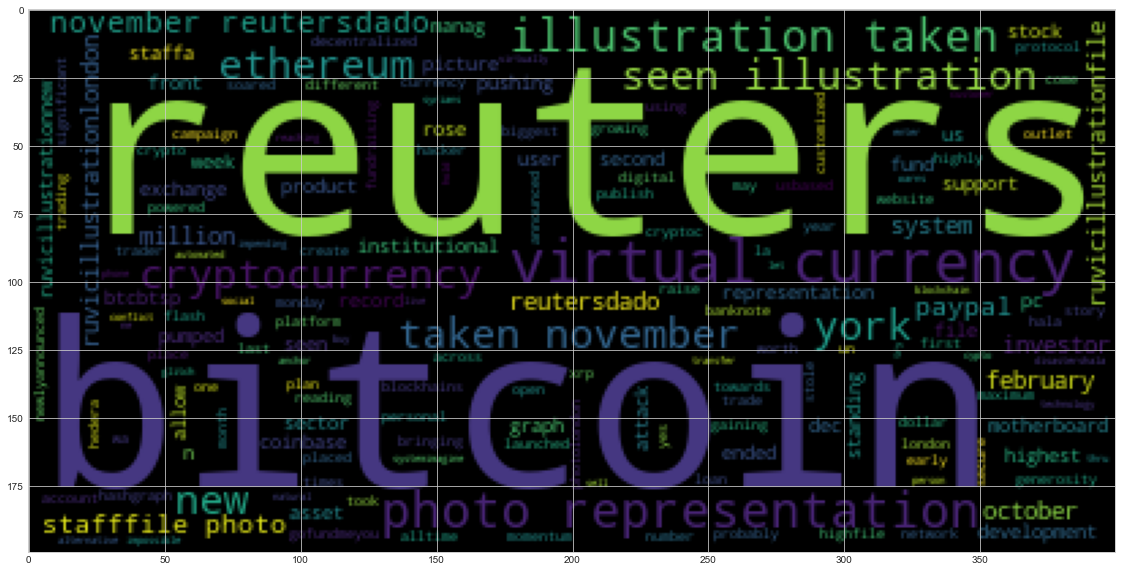

In [39]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(eth_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [40]:
import spacy
from spacy import displacy

In [41]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [42]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [43]:
# Concatenate all of the Bitcoin text together
btc_text = []
for text in bitcoin_news_df['text']:
        btc_text.append(text)

In [44]:
btc_all_text = ' '.join(btc_text)


In [75]:
# Run the NER processor on all of the text
doc_btc = nlp(btc_all_text)

# Add a title to the document
doc_btc.user_data["title"] = "BTC News NER"

In [76]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [48]:
# List all Entities
print([ent.text for ent in doc.ents])

['Microsoft', 'Ukraine', 'nine years', 'more than $10 million', 'Microsoft', '2016 to 2018', 'Visa', 'first', 'Bitcoin', 'PayPal', 'US', 'first', 'US', 'October', 'November 2017', 'two-month', 'Bitcoin', '10,000', 'first', 'the next 20 days', '19,665', 'digital yuan', 'the People’s Bank of China', 'the past few weeks', 'bitcoin', 'digital', 'hype', 'Six years', 'Mexico', '$62 million', 'Decentralized', '4', 'U.S.', 'November', 'today', '500', '10.8 percent', 'November', 'monthly', 'April', 'fourth', 'Maisie Williams', 'Arya Stark', 'Lady Catelyn', 'Eddard', 'acolyte', 'the Faceless Men', 'Monday', '1', '1', 'Microsoft', 'Ukraine', 'nine years', 'more than $10 million', 'Microsoft', '8', '7', 'Bitcoin', 'above $18,000', 'Tuesday', 'evening', 'December 2017', 'this week', 'more than $18,000', 'Bitcoin', 'March 13, 2020', 'REUTERS/', 'Tom Wilson', 'Justin HarperBusiness', 'BBC News', 'Bitcoin', 'above $17,000', '12,800', 'three-year', 'Bitcoin', 'this week', 'Reuters', 'Bitcoin', 'Novembe

---

### Ethereum NER

In [50]:
# Concatenate all of the Ethereum text together
eth_text = []
for text in ethereum_news_df['text']:
        eth_text.append(text)

In [52]:
eth_all_text = ' '.join(eth_text)


In [77]:
# Run the NER processor on all of the text
doc_eth = nlp(eth_all_text)

# Add a title to the document
doc_eth.user_data["title"] = "ETH News NER"

In [78]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [60]:
# List all Entities
print([ent.text for ent in doc_eth.ents])

['PayPal', 'US', 'first', 'US', 'October', 'February 3, 2018', 'REUTERS/', 'Reuters', 'February 3, 2018', 'REUTERS/', 'Reuters', 'LONDON', 'Reuters', 'XRP', 'Monday', 'NEW YORK', 'Reuters', '$429 million', 'the week ended Dec. 7', 'second', 'NEW YORK', 'Reuters', '$429 million', 'the week ended Dec. 7', 'second', 'PayPal', 'the Generosity Network', '20,000', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'The New York Times', 'Coinbase', 'early February this year', 'last month', 'October', '$24 million', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'U.S.', 'May 26, 2020', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'LONDON', 'Reuters', 'Bitcoin', 'Hala Systems', 'Hedera', 'Syrians', 'Hala Systems', 'Paypal', '1', 'Bitcoin', 'Ethereum', 'bitcoin', 'Payp', 'Bitcoin', 'the Plug and Play

---